**Tugas 2**
- Memprediksi nilai umur pelanggan 3 bulan

**Deskripsi Data**

1. InvoiceNo: ID Unik sebagai identifikasi setiap transaksi
2. StockCode: ID Unik sebagai identifikasi setiap produk
3. Description: Deskripsi produk
4. Quantity: Jumlah item yang dibeli
5. InvoiceDate: Tanggal transaksi
6. UnitPrice: Harga produk per item
7. CustomerID: ID Unik sebagai identifikasi setiap pelanggan
8. Country: Negara asal pelanggan

# Preprocessing Data

In [199]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix

In [200]:
df = pd.read_csv('online_retail.csv', delimiter=';', encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850.0,United Kingdom


In [201]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['UnitPrice'] = df['UnitPrice'].str.replace(',','.').astype(float)

In [202]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [203]:
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [204]:
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom


In [205]:
df[df['UnitPrice']==0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-05-12 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-06-01 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-06-01 16:41:00,0.0,13081.0,United Kingdom


In [206]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [207]:
df['InvoiceRevenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [208]:
df.describe()

,Quantity,UnitPrice,CustomerID,InvoiceRevenue
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


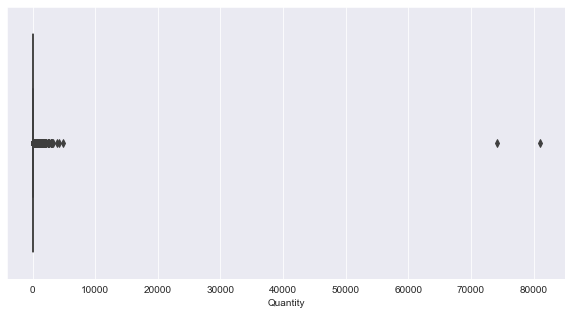

In [209]:
# Membuat boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='Quantity', data=df)
plt.show()

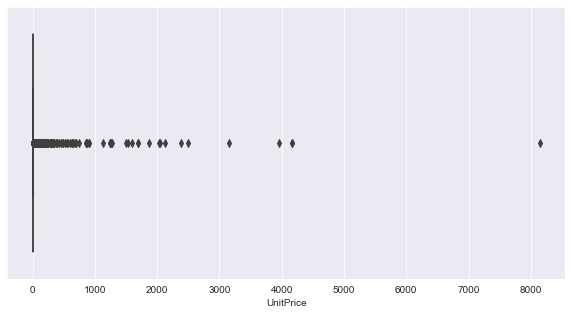

In [210]:
plt.figure(figsize=(10,5))
sns.boxplot(x='UnitPrice', data=df)
plt.show()

Karena beberapa data memiliki nilai yang sangat besar, maka akan dilakukan penghapusan outlier

In [211]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_threshold(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit

replace_with_threshold(df, 'Quantity')
replace_with_threshold(df, 'UnitPrice')
replace_with_threshold(df, 'InvoiceRevenue')

df.describe()

,Quantity,UnitPrice,CustomerID,InvoiceRevenue
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,8.317218,2.598157,15294.423453,14.384227
std,8.097234,2.103076,1713.141560,11.984448
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,27.000000,7.500000,18287.000000,42.480000


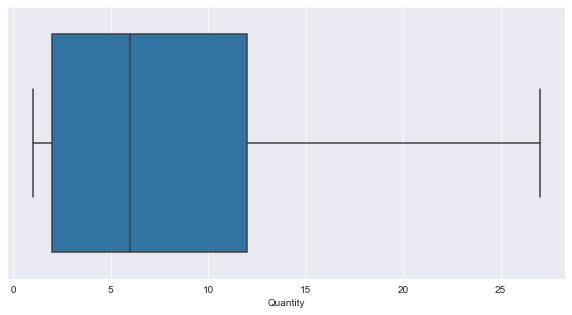

In [212]:
# Membuat boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='Quantity', data=df)
plt.show()

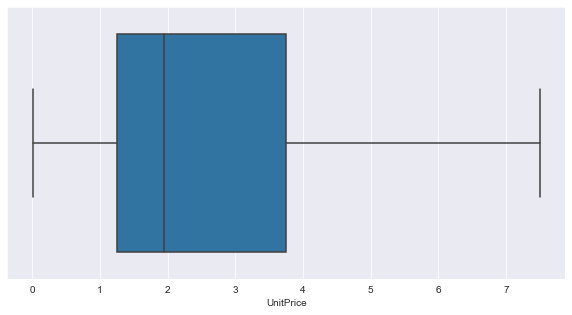

In [213]:
plt.figure(figsize=(10,5))
sns.boxplot(x='UnitPrice', data=df)
plt.show()

dapat dilihat bahwa data outlier sudah tidak ada

# RFM Analysis

In [214]:
today_date = dt.datetime(2011, 12, 11)

In [215]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days,
                                                     lambda date: (today_date - date.min()).days],
                                     'InvoiceNo': lambda num: num.nunique(),
                                     'InvoiceRevenue': lambda price: price.sum()})
rfm.columns = ['recency', 'tenure', 'frequency', 'monetary']
rfm.head()

,recency,tenure,frequency,monetary
CustomerID,,,,
12346.0,0,326,1,42.48
12347.0,475,516,7,3769.34
12348.0,282,359,4,1111.40
12349.0,0,19,1,1442.71
12350.0,0,311,1,334.40


# BG-NBD Model

In [216]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    4338 non-null   int64  
 1   tenure     4338 non-null   int64  
 2   frequency  4338 non-null   int64  
 3   monetary   4338 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 169.5 KB


In [217]:
rfm = rfm[rfm['frequency'] > 1]
rfm.head()

,recency,tenure,frequency,monetary
CustomerID,,,,
12347.0,475,516,7,3769.34
12348.0,282,359,4,1111.40
12352.0,268,341,8,1718.14
12356.0,302,326,3,1813.41
12358.0,116,120,2,567.46


In [218]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(rfm['frequency'], rfm['recency'], rfm['tenure'])

rfm['expected_purchases'] = bgf.predict(365,
                                         rfm['frequency'],
                                         rfm['recency'],
                                         rfm['tenure']
                                        )
rfm.sort_values(by='expected_purchases', ascending=False).head(10)

,recency,tenure,frequency,monetary,expected_purchases
CustomerID,,,,,
12748.0,692,697,209,28013.98,92.909581
14911.0,697,697,201,114220.76,89.514977
14646.0,353,355,73,77348.14,56.574517
17841.0,696,697,124,38342.02,55.621501
13089.0,571,577,97,43398.99,51.093145
14606.0,691,697,93,11724.16,41.938638
15311.0,697,697,91,30829.74,41.106975
12971.0,656,666,86,7728.96,40.316718
18102.0,503,516,60,17687.49,34.995312


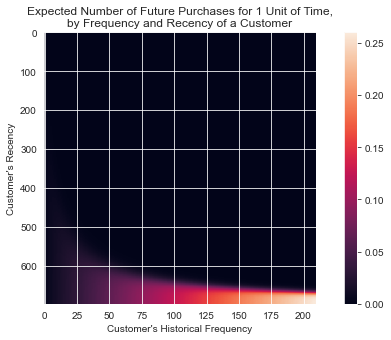

In [219]:
plt.figure(figsize=(10,5))
plot_frequency_recency_matrix(bgf)
plt.show()

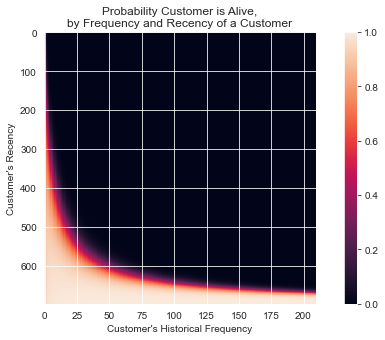

In [220]:
plt.figure(figsize=(10,5))
plot_probability_alive_matrix(bgf)
plt.show()

# Gamma Gamma Model

In [221]:
ggf = GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(rfm['frequency'], rfm['monetary'])

rfm['expected_average_profit'] = ggf.conditional_expected_average_profit(rfm['frequency'],
                                                                         rfm['monetary']
                                                                        )
rfm.sort_values(by='expected_average_profit', ascending=False).head(10)

,recency,tenure,frequency,monetary,expected_purchases,expected_average_profit
CustomerID,,,,,,
14911.0,697,697,201,114220.76,89.514977,114246.213663
14646.0,353,355,73,77348.14,56.574517,77395.669579
14096.0,292,304,17,49360.20,16.206296,49490.955462
13089.0,571,577,97,43398.99,51.093145,43419.109025
14298.0,307,361,44,41170.43,21.140574,41212.542576
17841.0,696,697,124,38342.02,55.621501,38355.933844
14156.0,637,638,55,37033.96,27.199422,37064.280072
17511.0,691,697,31,34138.43,14.688291,34188.078122
15311.0,697,697,91,30829.74,41.106975,30845.011643


# CLV Prediction

In [223]:
rfm['three_month_CLV'] = ggf.customer_lifetime_value(bgf,
                                                     rfm['frequency'],
                                                     rfm['recency'],
                                                     rfm['tenure'],
                                                     rfm['monetary'],
                                                     time=3,
                                                     freq="D",
                                                     discount_rate=0.01
                                                    )
rfm = rfm.sort_values(by='three_month_CLV', ascending=False)
rfm = rfm.reset_index()
rfm

,index,CustomerID,recency,tenure,frequency,monetary,expected_purchases,expected_average_profit,three_month_CLV
0,0,14911.0,697,697,201,114220.76,8.951498e+01,114246.213663,2.510050e+06
1,1,14646.0,353,355,73,77348.14,5.657452e+01,77395.669579,1.084080e+06
2,2,12748.0,692,697,209,28013.98,9.290958e+01,28020.025434,6.389587e+05
3,3,13089.0,571,577,97,43398.99,5.109315e+01,43419.109025,5.457245e+05
4,4,17841.0,696,697,124,38342.02,5.562150e+01,38355.933844,5.236456e+05
...,...,...,...,...,...,...,...,...,...
2840,2840,16792.0,0,310,2,110.38,2.954948e-01,118.797523,8.744544e+00
2841,2841,15422.0,0,324,2,97.70,2.499639e-01,105.827771,6.584936e+00
2842,2842,14813.0,0,577,2,155.43,2.172757e-02,164.876966,8.840443e-01
2843,2843,16048.0,0,697,2,224.76,9.044422e-03,235.791234,5.249424e-01


In [224]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    2845 non-null   int64  
 1   CustomerID               2845 non-null   float64
 2   recency                  2845 non-null   int64  
 3   tenure                   2845 non-null   int64  
 4   frequency                2845 non-null   int64  
 5   monetary                 2845 non-null   float64
 6   expected_purchases       2845 non-null   float64
 7   expected_average_profit  2845 non-null   float64
 8   three_month_CLV          2845 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 200.2 KB


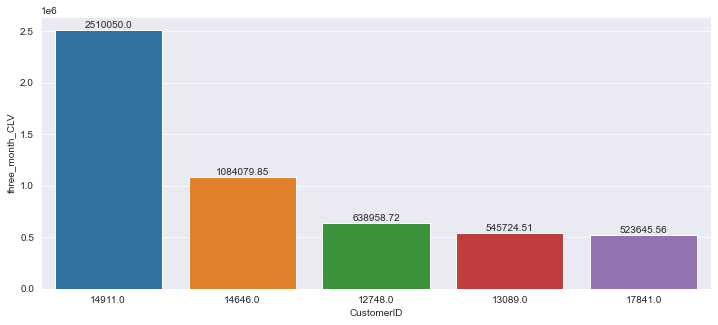

In [228]:
# 5 pelanggan dengan nilai CLV tertinggi
rfm['CustomerID'] = rfm['CustomerID'].astype(str)
plt.figure(figsize=(12,5))
sns.barplot(x='CustomerID', y='three_month_CLV', data=rfm.sort_values(by='three_month_CLV', ascending=False).head())
for i, txt in enumerate(rfm.sort_values(by='three_month_CLV', ascending=False).head()['three_month_CLV']):
    plt.annotate(round(txt,2), (i, txt), ha='center', va='bottom')
plt.show()